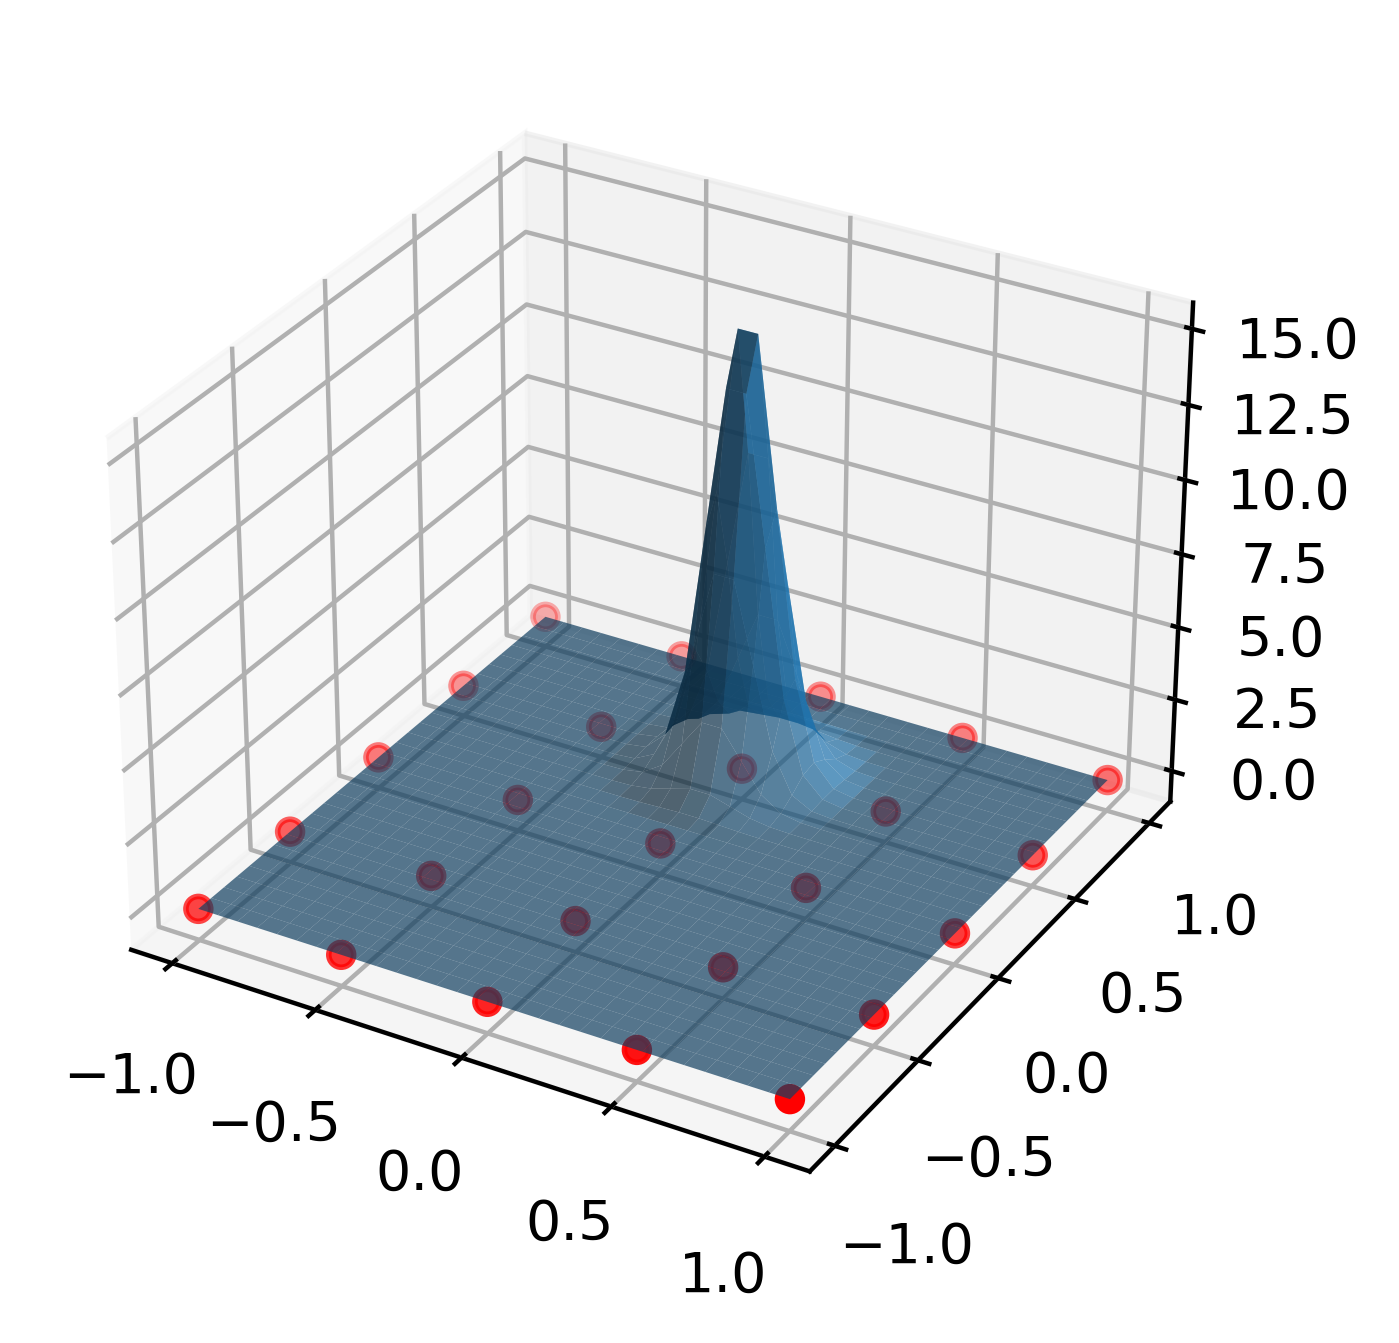

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.5])

sigma = np.array([.1, .1])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)


x_vec = np.linspace(-1,1,5)
y_vec = np.linspace(-1,1,5)

grid = np.meshgrid(x_vec, y_vec)


fig = plt.figure(dpi=400)

ax = fig.add_subplot(111, projection='3d')


ax.scatter(grid[0], grid[1], color="red")
ax.plot_surface(x,y,z, alpha = 0.7)
#ax.plot_wireframe(x,y,z)
plt.savefig("../../Stage/rapport/fig/meshgrid.png")
plt.show()

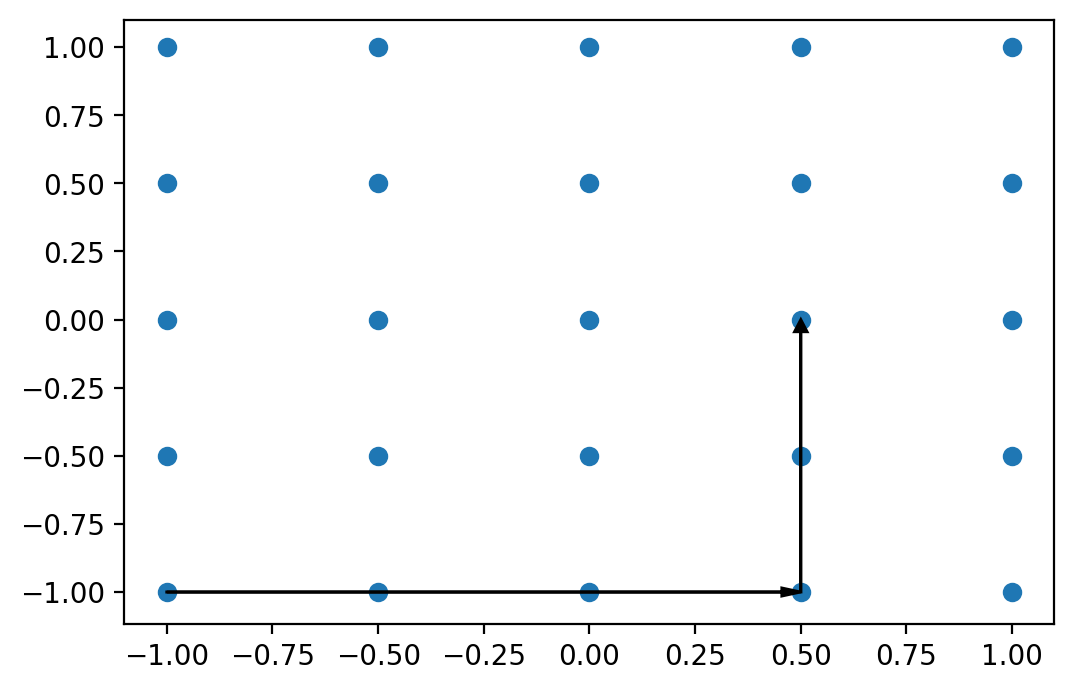

In [2]:
plt.figure(dpi=200)
plt.scatter(grid[0],grid[1])
plt.arrow(-1,-1,1.5,0, length_includes_head=True, head_width=.03, color='black')
plt.arrow(.5,-1,0,1, length_includes_head=True, head_width=.03, color='black')
plt.savefig("../../Stage/rapport/fig/integration_path.png")

In [3]:
import scipy.stats as st
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
n_components = 3
X, truth = make_blobs(n_samples=300, centers=n_components, 
                      cluster_std = [.1,.1,.1], 
                      random_state=42)

# Extract x and y
x = X[:, 0]
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

-8.326605274569944 6.071158326301397 -8.749962185210185 10.925963520317964


/home/nicolas/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


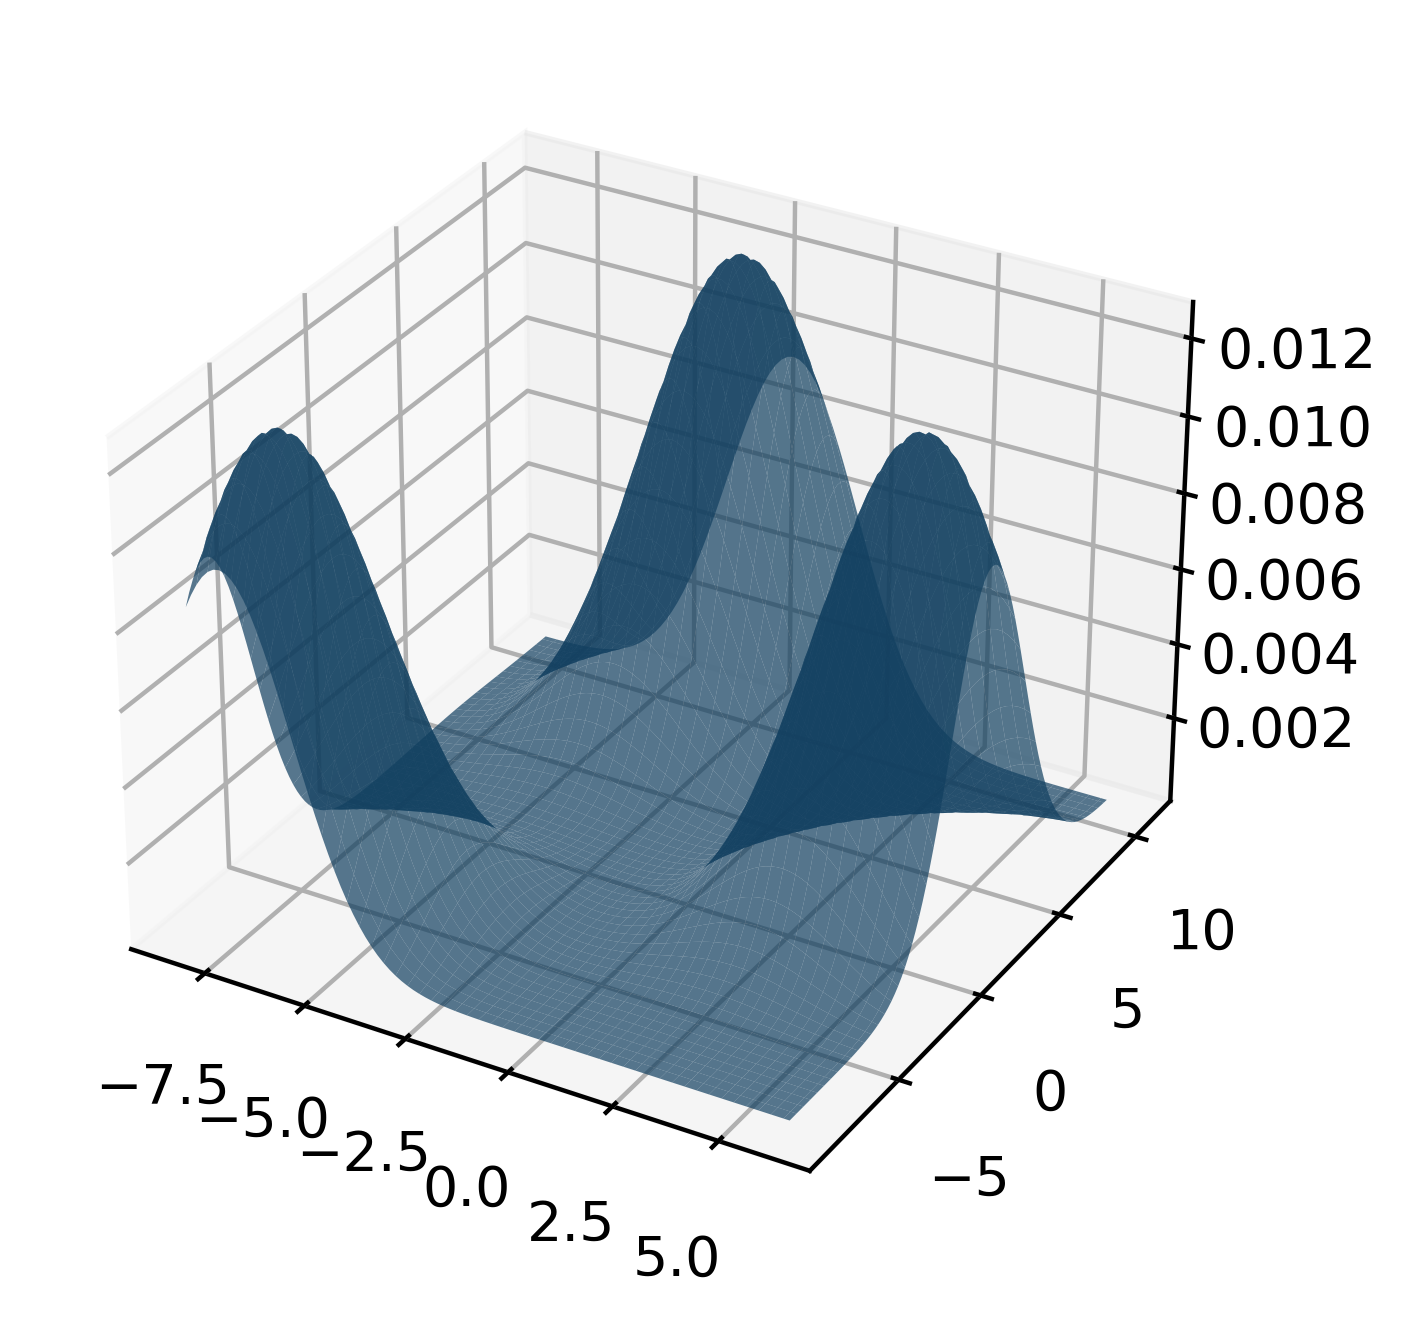

In [4]:
fig = plt.figure(dpi=400)

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx,yy,f, alpha = 0.7)

In [5]:
x1,y1 = np.random.default_rng().multivariate_normal([.5,.5], [[.01,0],[0,.01]], 5000).T
x2,y2 = np.random.default_rng().multivariate_normal([0,-.5], [[.01,0],[0,.01]], 5000).T
x3,y3 = np.random.default_rng().multivariate_normal([-.5,.5], [[.01,0],[0,.01]], 5000).T


In [6]:
x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

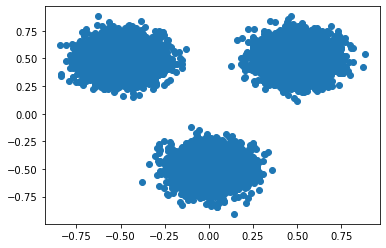

In [7]:
plt.scatter(x,y)

In [8]:
xx, yy = np.mgrid[0:1:100j, 0:1:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

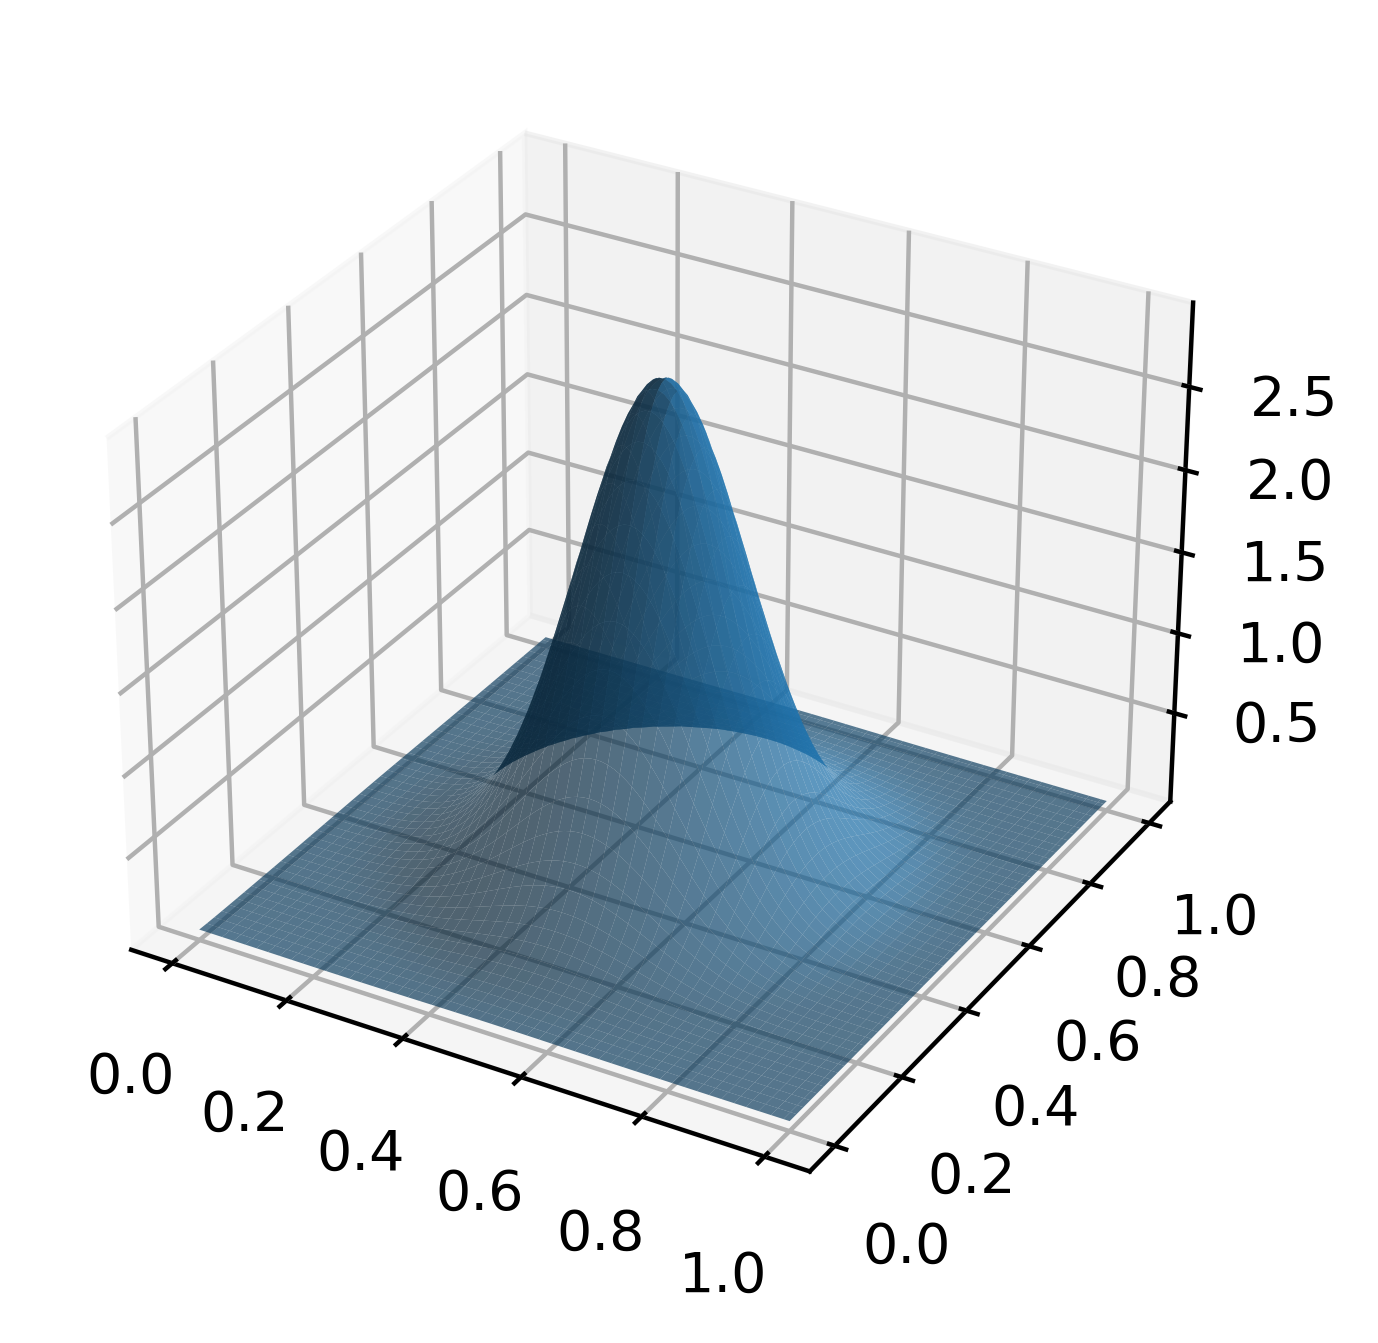

In [9]:
fig = plt.figure(dpi=400)

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx,yy,f, alpha = 0.7)